In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Name of the CSV file
file = Path('Resources/Video_Games.csv')

In [3]:
# build df from .csv with encoding
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

## Joey's Analysis

In [4]:
#clean data - remove null values in Year of Release and publisher, change year type from float to int
df = df[(df.Year_of_Release.notnull()) & (df.Publisher.notnull())]
df['Year_of_Release'] = df['Year_of_Release'].astype('int')

In [5]:
total = round(df['Global_Sales'].sum())
total

8813

In [6]:
#Define different dataframes (Will be used seperately for different tasks/analysis by each team member)

#Define dataframe for data on game release year only
# game_releases_df = game_2k_df[['Name','Year_of_Release']]

In [7]:
#Define a dataframe that contains data from year 2000 and later, drop data for 2017 and later. (Little to no useful data from 2017+)
game_2k_df = df.loc[(df['Year_of_Release'] >= 2000) & (df['Year_of_Release'] < 2017), :]

#Define dataframe for data on video game sales.
gs_df = game_2k_df[['Name','Year_of_Release','Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [8]:
#define new df to pull values of the games with the most global sales per platform
gmax = pd.DataFrame(gs_df.groupby('Platform')['Global_Sales'].max())

#merge the data and parse to retrieve only desired data
top_games2k_df = pd.merge(gs_df, gmax, how='inner', on=['Platform','Global_Sales'])
top_global_df = gs_df[['Name', 'Platform', 'Year_of_Release','Global_Sales']]
top_global_df

Name Platform  Year_of_Release  Global_Sales
0                         Wii Sports      Wii             2006         82.53
2                     Mario Kart Wii      Wii             2008         35.52
3                  Wii Sports Resort      Wii             2009         32.77
6              New Super Mario Bros.       DS             2006         29.80
7                           Wii Play      Wii             2006         28.92
...                              ...      ...              ...           ...
16714  Samurai Warriors: Sanada Maru      PS3             2016          0.01
16715               LMA Manager 2007     X360             2006          0.01
16716        Haitaka no Psychedelica      PSV             2016          0.01
16717               Spirits & Spells      GBA             2003          0.01
16718            Winning Post 8 2016      PSV             2016          0.01

[14438 rows x 4 columns]

In [9]:
#Parse data into dataframe to analyze platform sales data.
sorted_df = game_2k_df[['Platform','Year_of_Release', 'Global_Sales']].sort_values(by=['Year_of_Release'])
groups = pd.DataFrame(sorted_df.groupby(['Platform', 'Year_of_Release'])['Global_Sales'].sum())
groups

Global_Sales
Platform Year_of_Release              
3DS      2011                    63.17
         2012                    51.36
         2013                    56.64
         2014                    43.80
         2015                    27.81
...                                ...
XB       2008                     0.18
XOne     2013                    18.94
         2014                    54.14
         2015                    60.09
         2016                    26.27

[150 rows x 1 columns]

In [10]:
#List for unique years and unique platforms.
years = []
for year in sorted_df['Year_of_Release']:
    if year not in years:
        years.append(year)
        
print(years)

platforms = []

for platform in sorted_df['Platform']:
    if platform not in platforms:
        platforms.append(platform)
        
print(platforms)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
['PS2', 'N64', 'PS', 'DC', 'GBA', 'GB', 'PC', 'XB', 'WS', 'GC', 'DS', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']


In [11]:
#Dictionary that holds data for global sales per platform, per year and convert to df, set index to years
data = {
        x: [sorted_df[(sorted_df['Year_of_Release'] == y)  & (sorted_df['Platform'] == x)]['Global_Sales'].sum() for y in years]
        for x in platforms
    }

data_df = pd.DataFrame(data)
data_df ['Year'] = years
data_df.set_index('Year',inplace=True)
data_df

PS2    N64     PS    DC    GBA     GB     PC     XB    WS     GC  \
Year                                                                        
2000   39.11  34.01  96.30  5.99   0.06  19.76   4.68   0.99  0.68   0.00   
2001  166.43   3.26  35.52  1.07  61.62   9.24   5.51  22.24  0.28  26.30   
2002  205.40   0.08   6.69  0.29  74.38   0.00   8.59  48.15  0.00  51.93   
2003  184.29   0.00   2.05  0.00  56.73   0.00   8.91  55.16  0.00  50.66   
2004  211.78   0.00   0.00  0.00  72.79   0.00  10.41  65.50  0.00  28.89   
2005  160.65   0.00   0.00  0.00  32.47   0.00   4.41  49.17  0.00  27.80   
2006  103.42   0.00   0.00  0.00   5.35   0.00   2.91  10.15  0.00  11.29   
2007   76.00   0.00   0.00  0.02   2.22   0.00   9.33   0.55  0.00   0.27   
2008   53.83   0.00   0.00  0.04   0.00   0.00  12.59   0.18  0.00   0.00   
2009   26.45   0.00   0.00  0.00   0.00   0.00  16.94   0.00  0.00   0.00   
2010    5.63   0.00   0.00  0.00   0.00   0.00  24.20   0.00  0.00   0.00   
2011    0.47   0.00   0.00  0.00   0.00   0.00  34.91   0.00  0.00   0.00   
2012    0.00   0.00   0.00  0.00   0.00   0.00  23.28   0.00  0.00   0.00   
2013    0.00   0.00   0.00  0.00   0.00   0.00  12.40   0.00  0.00   0.00   
2014    0.00   0.00   0.00  0.00   0.00   0.00  13.30   0.00  0.00   0.00   
2015    0.00   0.00   0.00  0.00   0.00   0.00   8.55   0.00  0.00   0.00   
2016    0.00   0.00   0.00  0.00   0.00   0.00   5.27   0.00  0.00   0.00   

          DS    PSP    X360     Wii     PS3    3DS    PSV   WiiU     PS4  \
Year                                                                       
2000    0.00   0.00    0.00    0.00    0.00   0.00   0.00   0.00    0.00   
2001    0.00   0.00    0.00    0.00    0.00   0.00   0.00   0.00    0.00   
2002    0.00   0.00    0.00    0.00    0.00   0.00   0.00   0.00    0.00   
2003    0.00   0.00    0.00    0.00    0.00   0.00   0.00   0.00    0.00   
2004   17.27   7.11    0.00    0.00    0.00   0.00   0.00   0.00    0.00   
2005  130.22  43.89    8.27    0.00    0.00   0.00   0.00   0.00    0.00   
2006  119.92  55.45   51.66  137.12   20.95   0.00   0.00   0.00    0.00   
2007  147.26  47.05   95.43  152.89   73.14   0.00   0.00   0.00    0.00   
2008  145.45  34.52  135.25  171.45  118.48   0.00   0.00   0.00    0.00   
2009  119.46  37.78  120.28  207.08  130.89   0.00   0.00   0.00    0.00   
2010   84.98  34.98  170.08  128.18  142.38   0.00   0.00   0.00    0.00   
2011   26.26  17.82  143.94   59.64  156.79  63.17   4.60   0.00    0.00   
2012   11.06   7.69   99.65   21.71  107.27  51.36  16.28  17.54    0.00   
2013    1.54   3.14   88.58    8.60  113.17  56.64  10.58  21.68   25.97   
2014    0.00   0.24   34.78    3.75   47.63  43.80  11.87  22.03   99.97   
2015    0.00   0.12   11.95    1.14   16.87  27.81   6.23  16.33  118.96   
2016    0.00   0.00    1.52    0.18    3.58  15.14   4.24   4.58   69.29   

       XOne  
Year         
2000   0.00  
2001   0.00  
2002   0.00  
2003   0.00  
2004   0.00  
2005   0.00  
2006   0.00  
2007   0.00  
2008   0.00  
2009   0.00  
2010   0.00  
2011   0.00  
2012   0.00  
2013  18.94  
2014  54.14  
2015  60.09  
2016  26.27

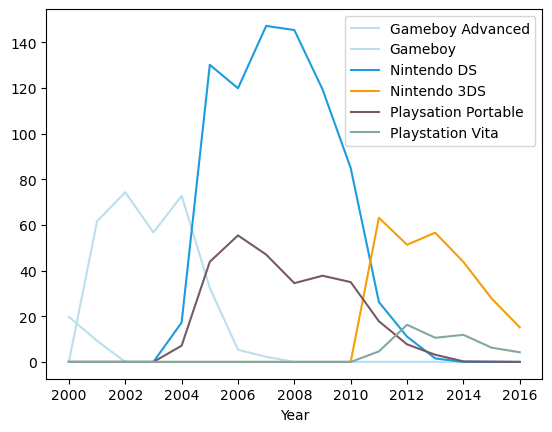

In [30]:
#plot linechart for handheld devices
handheld_df = data_df[['GBA', 'GB', 'DS','3DS','PSP','PSV']].copy()
handheld_df.columns = ['Gameboy Advanced', 'Gameboy', 'Nintendo DS', 'Nintendo 3DS','Playsation Portable', 'Playstation Vita']
handheld_df.plot(color=['#BBDEF0','#BBDEF0','#1C9CDC','#F49F0A','#785964','#82A7A6'])
plt.savefig('Output/fig1.png')
plt.show()

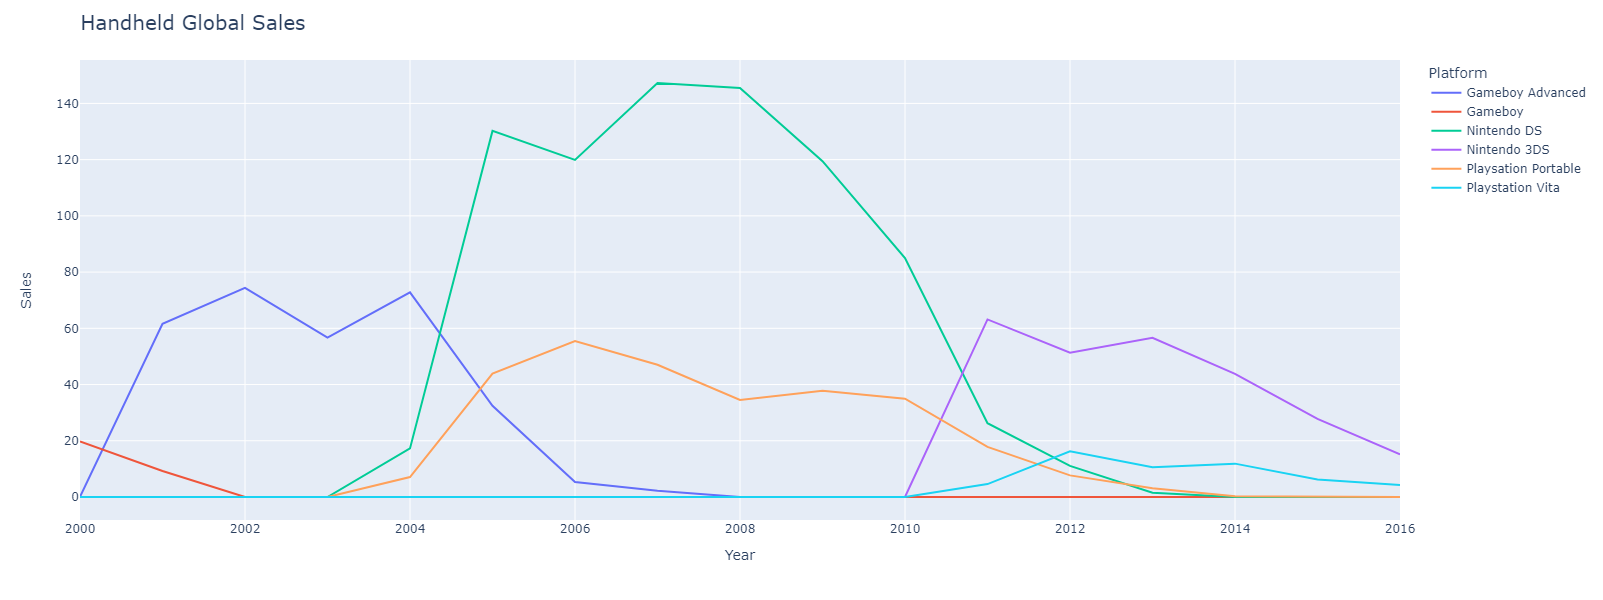

In [13]:
#dataframe for handheld devices
handheld_long_df = handheld_df.unstack().reset_index()
handheld_long_df.columns=['Platform','Year','Sales']

#plotly graph
fig = px.line(handheld_long_df, x="Year", y="Sales", color='Platform', height=600)
fig.update_layout(title=dict(text="Handheld Global Sales", font=dict(size=20)))
fig.show()

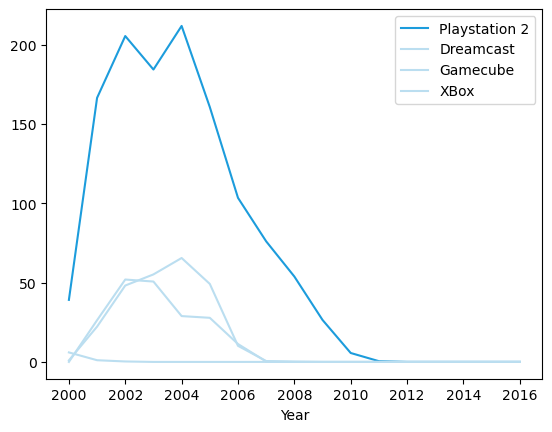

In [25]:
##plot linechart for sixth gen devices
gensix_df = data_df[['PS2', 'DC', 'GC','XB']].copy()
gensix_df.columns = ['Playstation 2', 'Dreamcast', 'Gamecube', 'XBox']
gensix_df.plot(color=['#1C9CDC','#BBDEF0','#BBDEF0','#BBDEF0'])
plt.savefig('Output/fig2.png')

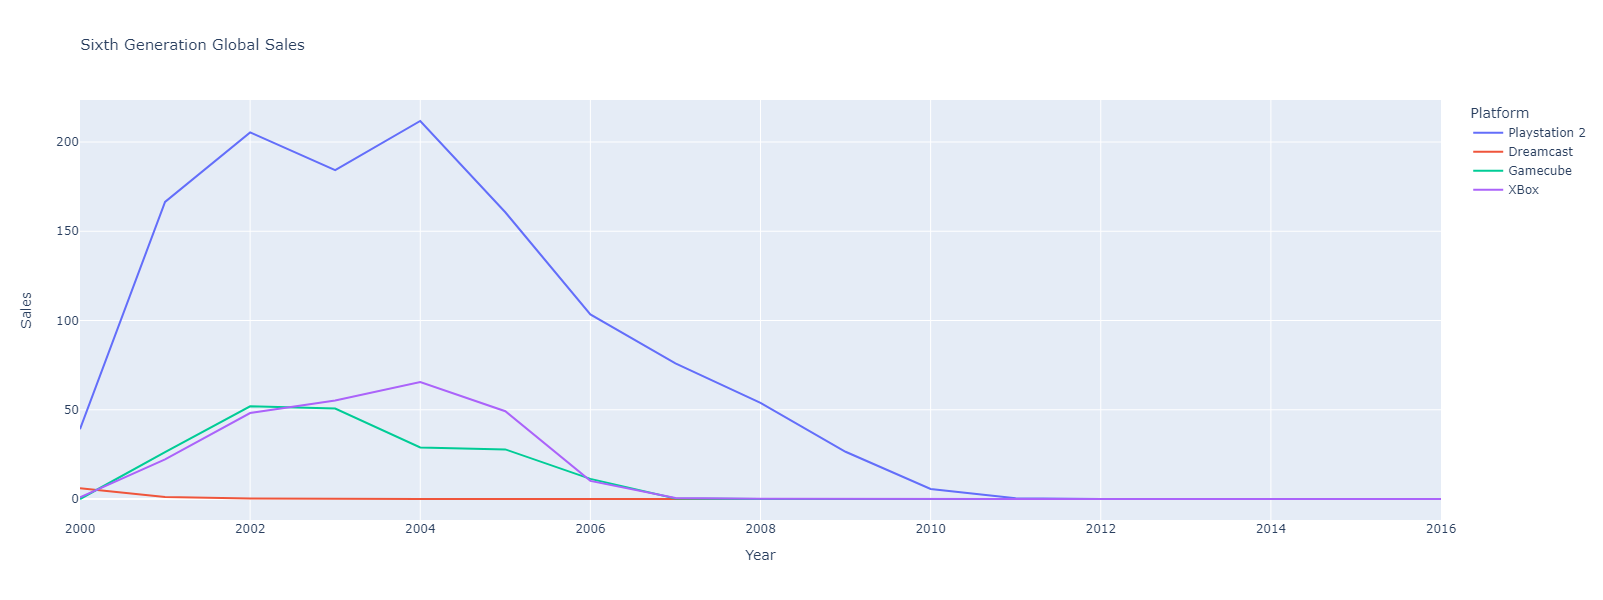

In [15]:
#dataframe for sixth gen devices
gensix_long_df = gensix_df.unstack().reset_index()
gensix_long_df.columns=['Platform','Year','Sales']

#plotly graph for gen six
fig = px.line(gensix_long_df, x="Year", y="Sales", color='Platform',title = "Sixth Generation Global Sales", height=600)
fig.update_layout(title=dict(text="Sixth Generation Global Sales", font=dict(size=15)))
fig.show()

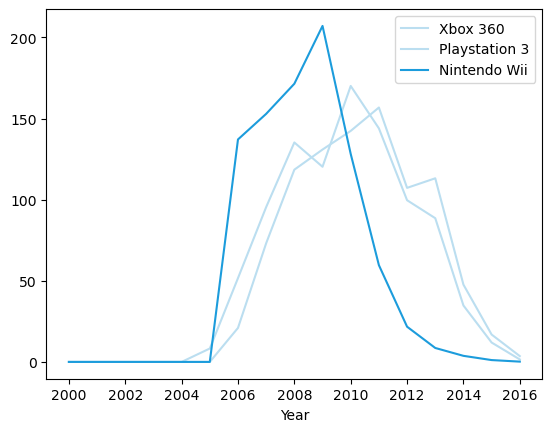

In [26]:
##plot linechart for seventh gen devices
genseven_df = data_df[['X360', 'PS3', 'Wii']].copy()
genseven_df.columns = ['Xbox 360', 'Playstation 3', 'Nintendo Wii']
genseven_df.plot(color=['#BBDEF0','#BBDEF0','#1C9CDC'])
plt.savefig('Output/fig3.png')

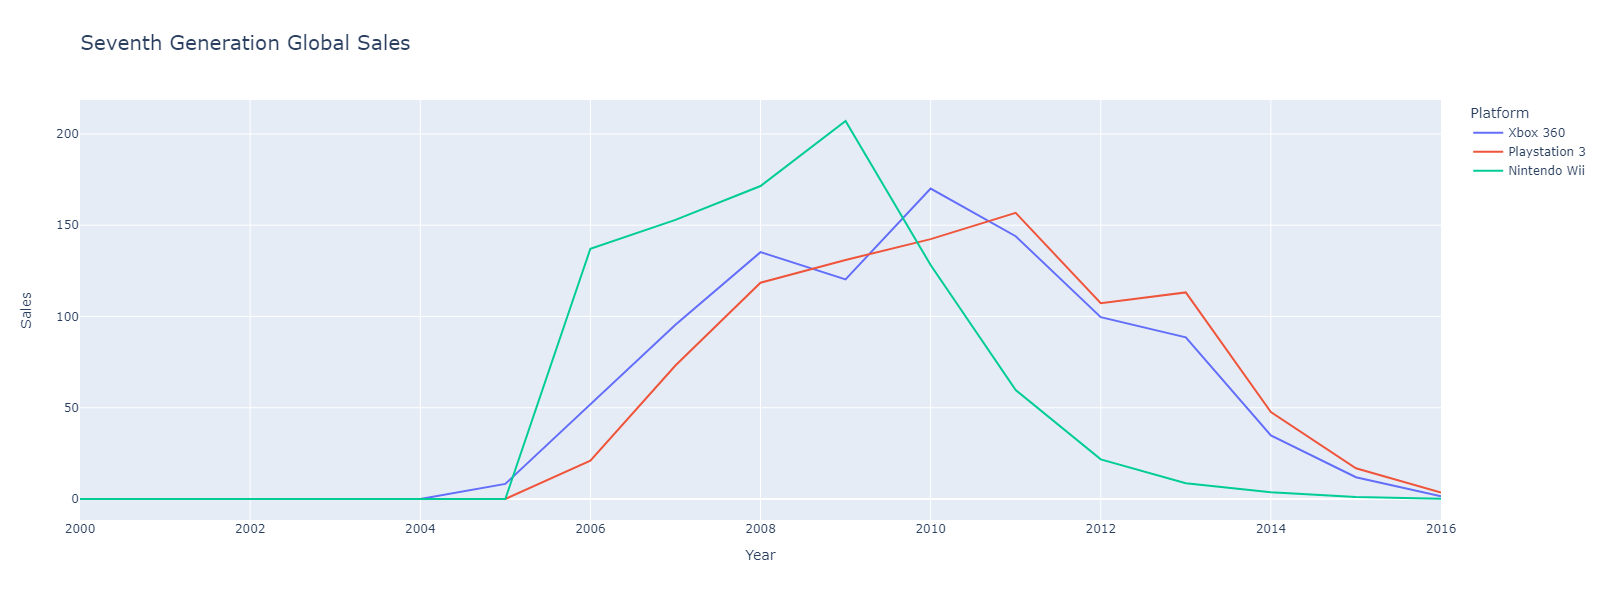

In [17]:
#dataframe for seventh gen devices
genseven_long_df = genseven_df.unstack().reset_index()
genseven_long_df.columns=['Platform','Year','Sales']

#plotly graph for gen seven
fig = px.line(genseven_long_df, x="Year", y="Sales", color='Platform', title = "Seventh Generation Global Sales", height=600)
fig.update_layout(title=dict(text="Seventh Generation Global Sales", font=dict(size=20)))
fig.show()

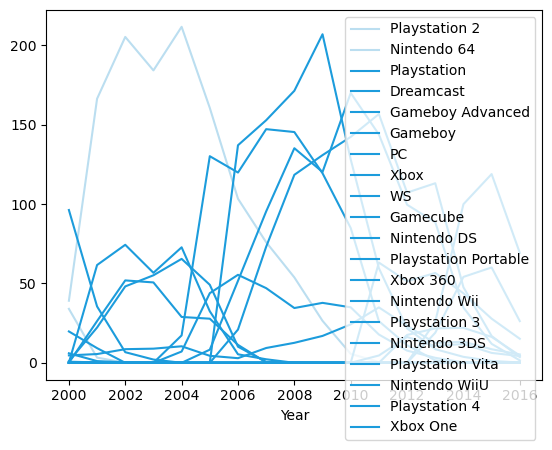

In [29]:

#Dataframe and graphs for all consoles 2000 - 2017
all_df = data_df[['PS2', 'N64', 'PS', 'DC', 'GBA', 'GB', 'PC', 'XB', 'WS', 'GC', 'DS', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']].copy()
all_df.columns = ['Playstation 2',
                  'Nintendo 64',
                  'Playstation',
                  'Dreamcast',
                  'Gameboy Advanced',
                  'Gameboy',
                  'PC',
                  'Xbox',
                  'WS',
                  'Gamecube',
                  'Nintendo DS',
                  'Playstation Portable',
                  'Xbox 360',
                  'Nintendo Wii',
                  'Playstation 3',
                  'Nintendo 3DS',
                  'Playstation Vita',
                  'Nintendo WiiU',
                  'Playstation 4',
                  'Xbox One']

all_df.plot(color=['#BBDEF0',
                   '#BBDEF0',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC'])
plt.savefig('Output/fig4.png')

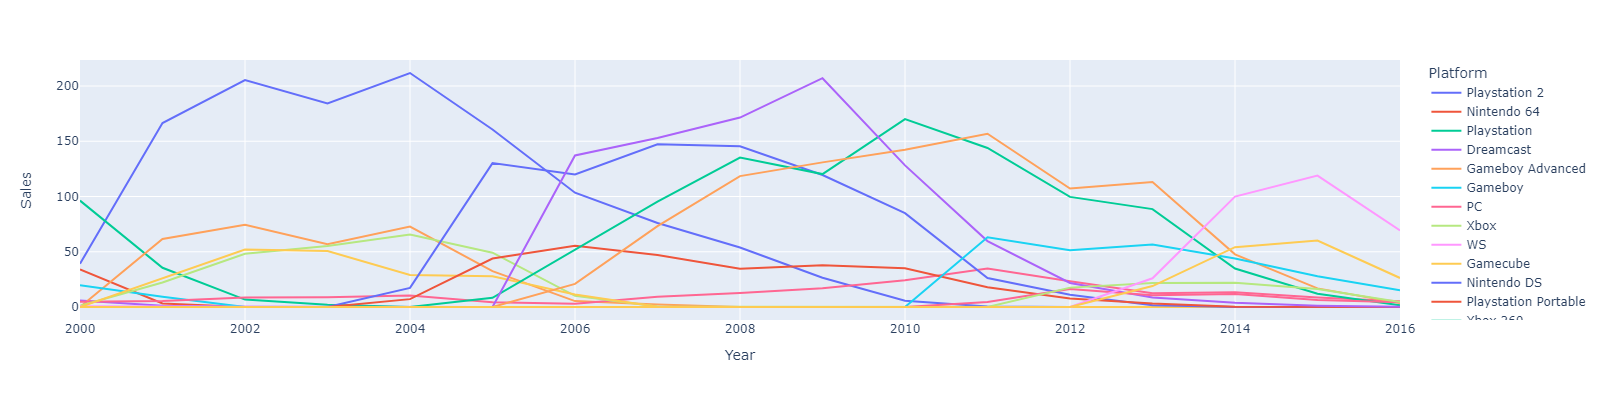

In [19]:
all_long_df = all_df.unstack().reset_index()
all_long_df.columns=['Platform','Year','Sales']

fig = px.line(all_long_df, x="Year", y="Sales", color='Platform',height=400)
fig.show()

In [20]:
#Sales Data for each platform
for platform in platforms:
    pmax = data_df[platform].max()
    psum = data_df[platform].sum()
    pindex = data_df[data_df[platform] == pmax].index[0]
    
          
    
    
    print(f'{platform}')
    print(f'Highest Selling year: {pindex} with {pmax} games sold')
    print(f'Total lifetime sales: {psum}')
    print()

PS2
Highest Selling year: 2004 with 211.77999999999997 games sold
Total lifetime sales: 1233.46

N64
Highest Selling year: 2000 with 34.01 games sold
Total lifetime sales: 37.349999999999994

PS
Highest Selling year: 2000 with 96.30000000000001 games sold
Total lifetime sales: 140.56

DC
Highest Selling year: 2000 with 5.99 games sold
Total lifetime sales: 7.41

GBA
Highest Selling year: 2002 with 74.38 games sold
Total lifetime sales: 305.62

GB
Highest Selling year: 2000 with 19.76 games sold
Total lifetime sales: 29.0

PC
Highest Selling year: 2011 with 34.91 games sold
Total lifetime sales: 206.19

XB
Highest Selling year: 2004 with 65.5 games sold
Total lifetime sales: 252.09

WS
Highest Selling year: 2000 with 0.68 games sold
Total lifetime sales: 0.9600000000000001

GC
Highest Selling year: 2002 with 51.93000000000001 games sold
Total lifetime sales: 197.14000000000001

DS
Highest Selling year: 2007 with 147.26 games sold
Total lifetime sales: 803.4199999999998

PSP
Highest Sell

In [23]:
#critic and user score data (Additional exploratory analysis)
print("Max number of critic reviews : " + str(df['Critic_Count'].max()))
print("Min number of critic reviews : " + str(df['Critic_Count'].min()))
print("Avg number of critic reviews : " + str(df['Critic_Count'].mean()))
print("Max number of user reviews : " + str(df['User_Count'].max()))
print("Min number of user reviews : " + str(df['User_Count'].min()))
print("Avg number of user reviews : " + str(df['User_Count'].mean()))

print('*'*80)
scores_df = game_2k_df[['Name','Genre','Year_of_Release','Critic_Score','Critic_Count', 'User_Score', 'User_Count','Platform']]
scores_df = scores_df.dropna()
user_count_df = scores_df.sort_values(by=['User_Count'], ascending=False)
print('*'*80)

scores_df = scores_df.sort_values(by=['User_Count'], ascending=False)
top_15 = scores_df.head(15)

top_15

Max number of critic reviews : 113.0
Min number of critic reviews : 3.0
Avg number of critic reviews : 26.440992232523175
Max number of user reviews : 10665.0
Min number of user reviews : 4.0
Avg number of user reviews : 163.0088459991958
********************************************************************************
********************************************************************************


Name         Genre  Year_of_Release  \
2851         The Witcher 3: Wild Hunt  Role-Playing             2015   
303          The Witcher 3: Wild Hunt  Role-Playing             2015   
11288          Counter-Strike: Source       Shooter             2004   
192                        Diablo III  Role-Playing             2012   
313       The Elder Scrolls V: Skyrim  Role-Playing             2011   
29     Call of Duty: Modern Warfare 3       Shooter             2011   
665                       Half-Life 2       Shooter             2004   
149                    The Last of Us        Action             2013   
1530                        Fallout 4  Role-Playing             2015   
3067                BioShock Infinite       Shooter             2013   
171        Uncharted 4: A Thief's End       Shooter             2016   
2356   Call of Duty: Modern Warfare 2       Shooter             2009   
623                        Bloodborne        Action             2015   
5379              Company of Heroes 2      Strategy             2013   
2703                         Portal 2       Shooter             2011   

       Critic_Score  Critic_Count User_Score  User_Count Platform  
2851           93.0          32.0        9.3     10665.0       PC  
303            92.0          79.0        9.2     10179.0      PS4  
11288          88.0           9.0        8.9      9851.0       PC  
192            88.0          86.0          4      9629.0       PC  
313            94.0          32.0        8.1      9073.0       PC  
29             88.0          81.0        3.4      8713.0     X360  
665            96.0          81.0        9.1      8665.0       PC  
149            95.0          98.0        9.1      8003.0      PS3  
1530           84.0          38.0        5.4      7512.0       PC  
3067           94.0          68.0        8.5      7322.0       PC  
171            93.0         113.0        7.9      7064.0      PS4  
2356           86.0          40.0        4.2      6430.0       PC  
623            92.0         100.0        8.6      6383.0      PS4  
5379           80.0          82.0        2.1      6157.0       PC  
2703           95.0          52.0        8.8      5999.0       PC

## Joe's Analysis

In [32]:
# build df from .csv with encoding
game_df = pd.read_csv(file, encoding="ISO-8859-1")
game_df.head()

# Number of games released each year excluding 2017 and beyond since it will throw off the data
game_df_clean = game_df.loc[game_df['Year_of_Release'] < 2017, :]

In [33]:
# Get number of games released and sort by year
number_of_released = game_df_clean['Year_of_Release'].value_counts()
number_of_released = number_of_released.sort_index()
number_of_released

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Year_of_Release, dtype: int64

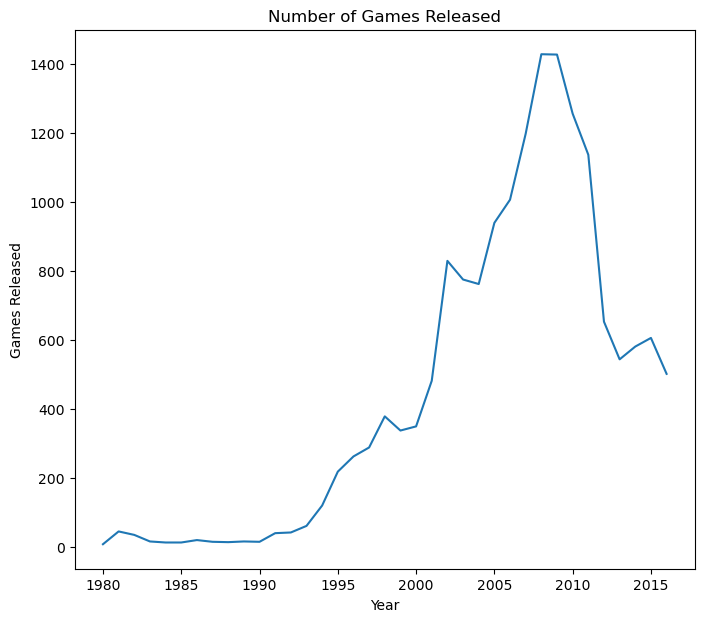

In [34]:
# Create a line graph for the number of released games
line = number_of_released.plot.line(figsize=(8,7))
plt.xlabel("Year")
plt.ylabel("Games Released")
plt.title("Number of Games Released")
line
plt.savefig('Output/fig5.png')

In [36]:
# get overall number of genres throught the years
game_genre = game_df_clean['Genre'].value_counts()
game_genre

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: Genre, dtype: int64

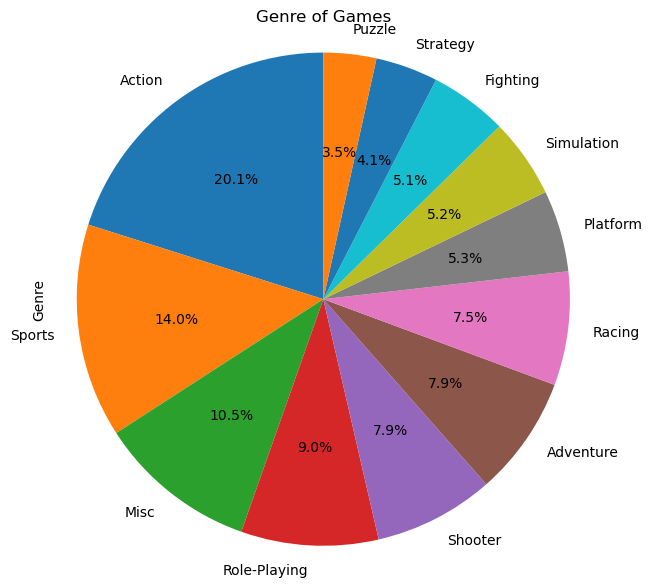

In [37]:
#create a pie chart to show the genre of games released overall
plot = game_genre.plot.pie(autopct="%1.1f%%", startangle=90, figsize=(7,7))
plt.title("Genre of Games")
plt.axis("equal")
plt.savefig('Output/fig6.png')

## Bahjo's Analysis

In [39]:
#From initial clean
#Define a dataframe that contains data from year 2000 and later, drop data for 2017 and later. (Little to no useful data from 2017+)
# game_2k_df = df.loc[(df['Year_of_Release'] >= 2000) & (df['Year_of_Release'] < 2017), :]

# #Define dataframe for data on video game sales.
# gs_df = game_2k_df[['Name','Year_of_Release','Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
gs_df

Name  Year_of_Release Platform  NA_Sales  \
0                         Wii Sports             2006      Wii     41.36   
2                     Mario Kart Wii             2008      Wii     15.68   
3                  Wii Sports Resort             2009      Wii     15.61   
6              New Super Mario Bros.             2006       DS     11.28   
7                           Wii Play             2006      Wii     13.96   
...                              ...              ...      ...       ...   
16714  Samurai Warriors: Sanada Maru             2016      PS3      0.00   
16715               LMA Manager 2007             2006     X360      0.00   
16716        Haitaka no Psychedelica             2016      PSV      0.00   
16717               Spirits & Spells             2003      GBA      0.01   
16718            Winning Post 8 2016             2016      PSV      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0         28.96      3.77         8.45         82.53  
2         12.76      3.79         3.29         35.52  
3         10.93      3.28         2.95         32.77  
6          9.14      6.50         2.88         29.80  
7          9.18      2.93         2.84         28.92  
...         ...       ...          ...           ...  
16714      0.00      0.01         0.00          0.01  
16715      0.01      0.00         0.00          0.01  
16716      0.00      0.01         0.00          0.01  
16717      0.00      0.00         0.00          0.01  
16718      0.00      0.01         0.00          0.01  

[14438 rows x 8 columns]

In [40]:
regions = ['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']
reg_sales = []
for r in regions:
    reg_sales.append(gs_df[r].sum())

reg_sales

[3523.86, 2083.22, 815.79, 728.0100000000001]

In [41]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} units)".format(pct, absolute)

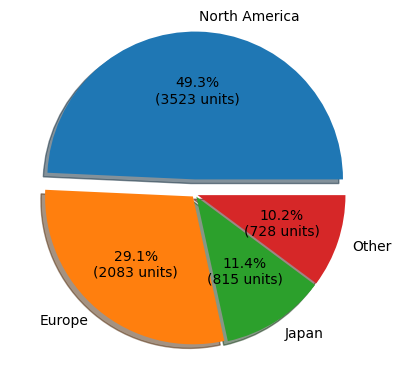

In [42]:
mylabels = ['North America', 'Europe', 'Japan', 'Other']
explode = (0.1,0.02,0.02,0.02)
plt.pie(reg_sales, labels = mylabels,explode = explode, shadow=True, autopct=lambda pct: func(pct, reg_sales))
plt.savefig("Output/Fig7.png")
plt.show() 


### Isaac's Analysis

In [43]:
#Highest Selling game of all tim
highest_sales_row = df.nlargest(1, 'Global_Sales')
highest_selling_game = highest_sales_row['Name'].iloc[0]
print("The highest selling game of all time is:", highest_selling_game)

The highest selling game of all time is: Wii Sports


In [44]:
#Lowest Selling game of all time
lowest_sales_row = df.nsmallest(1, 'Global_Sales')
lowest_selling_game = lowest_sales_row['Name'].iloc[0]
print("The lowest selling game of all time is:", lowest_selling_game)

The lowest selling game of all time is: Dragon Zakura DS


In [45]:
game_sales_df = df[['Name', 'Global_Sales', 'Platform']]
game_sales_df

Name  Global_Sales Platform
0                         Wii Sports         82.53      Wii
1                  Super Mario Bros.         40.24      NES
2                     Mario Kart Wii         35.52      Wii
3                  Wii Sports Resort         32.77      Wii
4           Pokemon Red/Pokemon Blue         31.37       GB
...                              ...           ...      ...
16714  Samurai Warriors: Sanada Maru          0.01      PS3
16715               LMA Manager 2007          0.01     X360
16716        Haitaka no Psychedelica          0.01      PSV
16717               Spirits & Spells          0.01      GBA
16718            Winning Post 8 2016          0.01      PSV

[16418 rows x 3 columns]

In [46]:
#50 HIGHEST selling games of all time
game_sales_df = df[['Global_Sales','Name', 'Platform']]
game_sales_df
top_50 = game_sales_df.sort_values('Global_Sales', ascending=False).head(50)

print(top_50)

    Global_Sales                                          Name Platform
0          82.53                                    Wii Sports      Wii
1          40.24                             Super Mario Bros.      NES
2          35.52                                Mario Kart Wii      Wii
3          32.77                             Wii Sports Resort      Wii
4          31.37                      Pokemon Red/Pokemon Blue       GB
5          30.26                                        Tetris       GB
6          29.80                         New Super Mario Bros.       DS
7          28.92                                      Wii Play      Wii
8          28.32                     New Super Mario Bros. Wii      Wii
9          28.31                                     Duck Hunt      NES
10         24.67                                    Nintendogs       DS
11         23.21                                 Mario Kart DS       DS
12         23.10                   Pokemon Gold/Pokemon Silver  

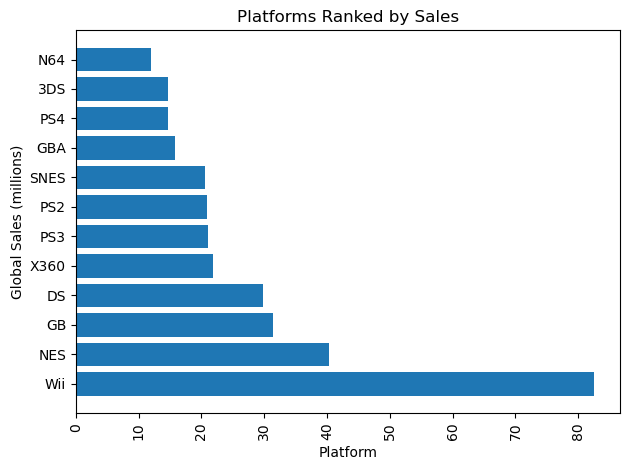

In [47]:
plt.barh(top_50['Platform'], top_50['Global_Sales'])
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.title('Platforms Ranked by Sales')

plt.tight_layout()
plt.savefig('Output/fig8.png')
plt.show()

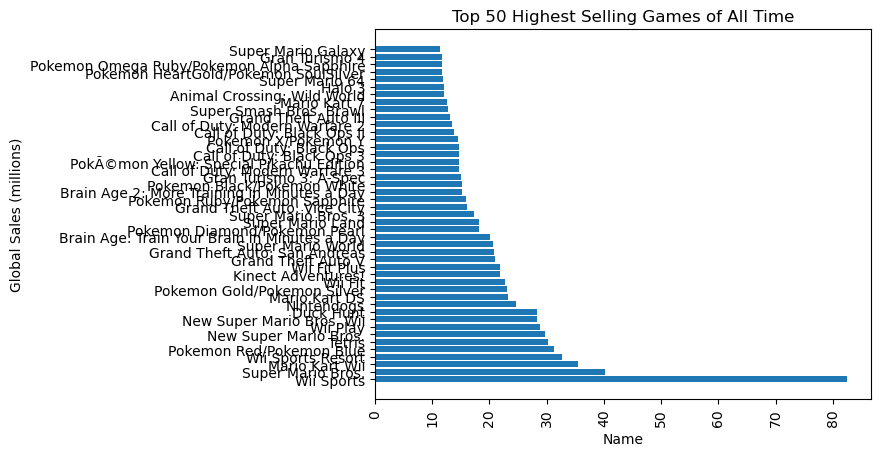

In [60]:
#Create Bar graph for 50 HIGHEST selling games of all time

plt.barh(top_50['Name'], top_50['Global_Sales'])
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Global Sales (millions)')
plt.title('Top 50 Highest Selling Games of All Time')
plt.show()

In [49]:
#50 LOWEST selling games of all time
game_sales_df = df[['Name', 'Global_Sales']]
game_sales_df
bottom_50 = game_sales_df.sort_values('Global_Sales', ascending=True).head(50)

print(bottom_50)

                                                    Name  Global_Sales
16718                                Winning Post 8 2016          0.01
16297        Adventure Time: The Secret of the Nameless           0.01
16295                                             Casper          0.01
16294  Simple 2000 Series Vol. 120: The Saigo no Nipp...          0.01
16293                 Rave Master: Special Attack Force!          0.01
16292                                     K-1 Grand Prix          0.01
16290                               Metal Slug Anthology          0.01
16289                                        Truck Racer          0.01
16288                                       Satisfashion          0.01
16287             Tantei Jinguuji Saburo: Hai to Diamond          0.01
16286                                   Toro to Morimori          0.01
16285    Fatal Fury: Battle Archives Volume 2 (JP sales)          0.01
16284                        Sakura-Sou no Pet na Kanojo          0.01
16283 

In [54]:
df = pd.read_csv('Resources/video_games.csv')

publisher_releases = df['Publisher'].value_counts()

print(publisher_releases)

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64


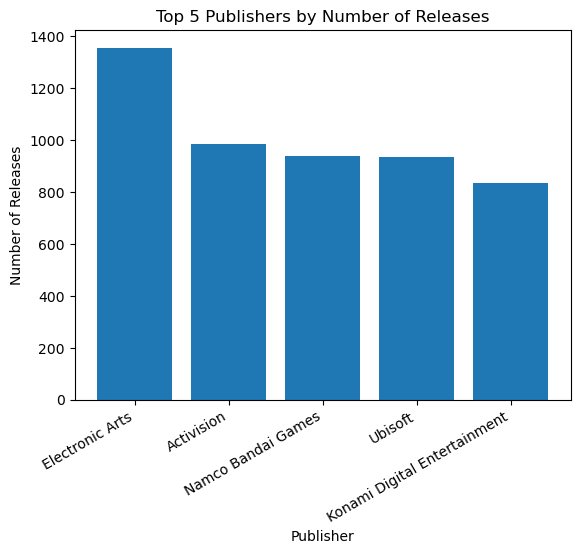

In [56]:
# Get the top 5 publishers
top_publishers = publisher_releases.head(5)

# Create a bar chart of the top 5 publishers
plt.bar(top_publishers.index, top_publishers.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Releases')
plt.title('Top 5 Publishers by Number of Releases')
plt.xticks(rotation = 30, ha = 'right')

plt.show()

In [58]:
# Define the list of publishers
publishers = ['Electronic Arts', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment']

# Filter the DataFrame for the specified publishers
filtered_df = df[df['Publisher'].isin(publishers)]

# Group the data by publisher and find the game with the maximum global sales
highest_selling_games = filtered_df.groupby('Publisher')['Global_Sales'].idxmax()
highest_selling_games = filtered_df.loc[highest_selling_games, ['Publisher', 'Name', 'Global_Sales']]

print(highest_selling_games)

                        Publisher                                 Name  \
77                Electronic Arts                              FIFA 16   
144  Konami Digital Entertainment  Metal Gear Solid 2: Sons of Liberty   
266            Namco Bandai Games                         Namco Museum   
61                        Ubisoft                         Just Dance 3   

     Global_Sales  
77           8.57  
144          6.05  
266          4.24  
61          10.12  


In [59]:
# Create an empty dictionary to store the number one selling game for each publisher
top_games = {}

# Iterate over the top publishers
for publisher in top_publishers.index:
    # Filter the DataFrame for the current publisher
    publisher_df = df[df['Publisher'] == publisher]
    
    # Find the number one selling game for the current publisher
    top_game = publisher_df.loc[publisher_df['Global_Sales'].idxmax(), 'Name']
    
    # Store the number one selling game in the dictionary
    top_games[publisher] = top_game

# Print the top publishers and their number one selling games
for publisher, game in top_games.items():
    print(f"Publisher: {publisher}\tNumber One Selling Game: {game}")

Publisher: Electronic Arts	Number One Selling Game: FIFA 16
Publisher: Activision	Number One Selling Game: Call of Duty: Modern Warfare 3
Publisher: Namco Bandai Games	Number One Selling Game: Namco Museum
Publisher: Ubisoft	Number One Selling Game: Just Dance 3
Publisher: Konami Digital Entertainment	Number One Selling Game: Metal Gear Solid 2: Sons of Liberty
